In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycrp #Only to use the gaussian fit feature

/gpfs/fs1/home/z/zqhong/yongqi/pyCRP/pycrp/_event.py:32: UserWarning: No rawio installation found. Use the built-in non-supercdms MIDAS reader.
  warnings.warn("No rawio installation found. Use the built-in non-supercdms MIDAS reader.")


In [25]:
def find_channel(filename, noise_reject_rate = 0.01):
    ch_avalible =[]
    which_channels = []
    for i in range(32):
        ch_avalible.append("HIT_0_{0}".format(i))
        ch_avalible.append("HIT_1_{0}".format(i))
    hit_df = pd.read_csv(filename, sep=';', on_bad_lines='skip', usecols=ch_avalible).fillna(0).to_numpy()
    ch_list = np.argwhere(np.sum(hit_df, axis = 0) > noise_reject_rate*len(hit_df))
    which_channels = []
    for index in ch_list:
        if index[0] >= 32:
            which_channels.append(index[0]-32)
        else:
            which_channels.append(index[0])
    return which_channels

def load_dataset(filename, which_channels = ["0_8","0_20"], noise_reject_rate = 0.01):
    """
    Load DT5550W DAQ dataset (processing mode = "FULL")
    
    Inputs
    -------
    filename: str
        Filename path
    which_channels: list or "auto"
        If which_channels is list, read the sepcified channels
        If which_channels is "auto", find active channels 
    noise_reject_rate: float in [0,1]
        The percentage of events needed to be identified as active channels, required only when which_channels is "auto"
        
    Returns
    -------
    df: Pandas dataframe
    """
    cols_list = pd.read_csv(filename, nrows=0).columns.tolist()[0].split(sep=";")
    #metadata_name = cols_list[:10]+cols_list[int(len(cols_list)/2+2):int(len(cols_list)/2+8)]
    metadata_name = cols_list[:10]
    dtype_list = ["HIT_","CHARGE_", "COARSE_", "FINE_","RELATIVETIME_"]
    #dtype_list = ["HIT_","CHARGE_", "COARSE_", "FINE_",]
    if which_channels == "auto":
        ch_hit =[]
        for i in range(32):
            ch_hit.append("HIT_0_{0}".format(i))
            ch_hit.append("HIT_1_{0}".format(i))
        hit_df = pd.read_csv(filename, sep=';', on_bad_lines='skip', usecols=ch_hit).fillna(0).to_numpy()
        
        ch_list = np.argwhere(np.sum(hit_df, axis = 0) > noise_reject_rate*len(hit_df))
        which_channels = []
        for index in ch_list:
            if index >= 32:
                which_channels.append("1_{0}".format(index[0]-32))
            else:
                which_channels.append("0_{0}".format(index[0]))
    data_ch = []
    for channels in which_channels:
        for ch_name in dtype_list:
            data_ch.append(ch_name+channels)
    return pd.read_csv(filename, sep=';', on_bad_lines='skip', usecols=metadata_name+data_ch)


def find_alpha(df, channels = ['FINE_0_8', 'FINE_0_26']):
    """
    FInd the calibration parameters for channels
    
    Inputs
    -------
    df: Dict
        A dictionary from Pandas dataframe for DT5550W DAQ dataset

    channels: list
        Channels to calibrate
    
    Returns
    -------
    alpha: list
        calibration constent for channels
    """
    
    alpha = np.zeros(len(channels))
    for i,ch in enumerate(channels):
        mask = (np.array(df[ch]) > 4)& (np.array(df[ch]) < 1020) #remove fine time = 4, 1020 events
        print(np.min(np.array(df[ch])[mask]))
        print(np.max(np.array(df[ch])[mask]))
        alpha[i] = 25/(np.max(np.array(df[ch])[mask])-np.min(np.array(df[ch])[mask]))
    return alpha



dict_keys(['ID_CLUSTER', 'CLUSTER_RUN_Timecode_ns', 'CLUSTER_Timecode_ns', 'NEventsInCluster', 'ASIC_0', 'EventCounter_0', 'RUN_EventTimeCodeLSB_0', 'RUN_EventTimecode_ns_0', 'T0_to_Event_Timecode_0', 'T0_to_Event_Timecode_ns_0', 'HIT_0_14', 'HIT_0_17', 'CHARGE_0_14', 'CHARGE_0_17', 'COARSE_0_14', 'COARSE_0_17', 'FINE_0_14', 'FINE_0_17', 'RELATIVETIME_0_14', 'RELATIVETIME_0_17'])
113
813
111
810
40.678243931619896 0.6492837931153563
dict_keys(['ID_CLUSTER', 'CLUSTER_RUN_Timecode_ns', 'CLUSTER_Timecode_ns', 'NEventsInCluster', 'ASIC_0', 'EventCounter_0', 'RUN_EventTimeCodeLSB_0', 'RUN_EventTimecode_ns_0', 'T0_to_Event_Timecode_0', 'T0_to_Event_Timecode_ns_0', 'HIT_0_13', 'HIT_0_18', 'CHARGE_0_13', 'CHARGE_0_18', 'COARSE_0_13', 'COARSE_0_18', 'FINE_0_13', 'FINE_0_18', 'RELATIVETIME_0_13', 'RELATIVETIME_0_18'])
107
801
113
807
40.2331865738586 0.6567945092457403
dict_keys(['ID_CLUSTER', 'CLUSTER_RUN_Timecode_ns', 'CLUSTER_Timecode_ns', 'NEventsInCluster', 'ASIC_0', 'EventCounter_0', 'RUN_

No handles with labels found to put in legend.


dict_keys(['ID_CLUSTER', 'CLUSTER_RUN_Timecode_ns', 'CLUSTER_Timecode_ns', 'NEventsInCluster', 'ASIC_0', 'EventCounter_0', 'RUN_EventTimeCodeLSB_0', 'RUN_EventTimecode_ns_0', 'T0_to_Event_Timecode_0', 'T0_to_Event_Timecode_ns_0', 'HIT_0_1', 'HIT_0_31', 'CHARGE_0_1', 'CHARGE_0_31', 'COARSE_0_1', 'COARSE_0_31', 'FINE_0_1', 'FINE_0_31', 'RELATIVETIME_0_1', 'RELATIVETIME_0_31'])
121
822
290
978
33.32584831820932 0.9398219541080438


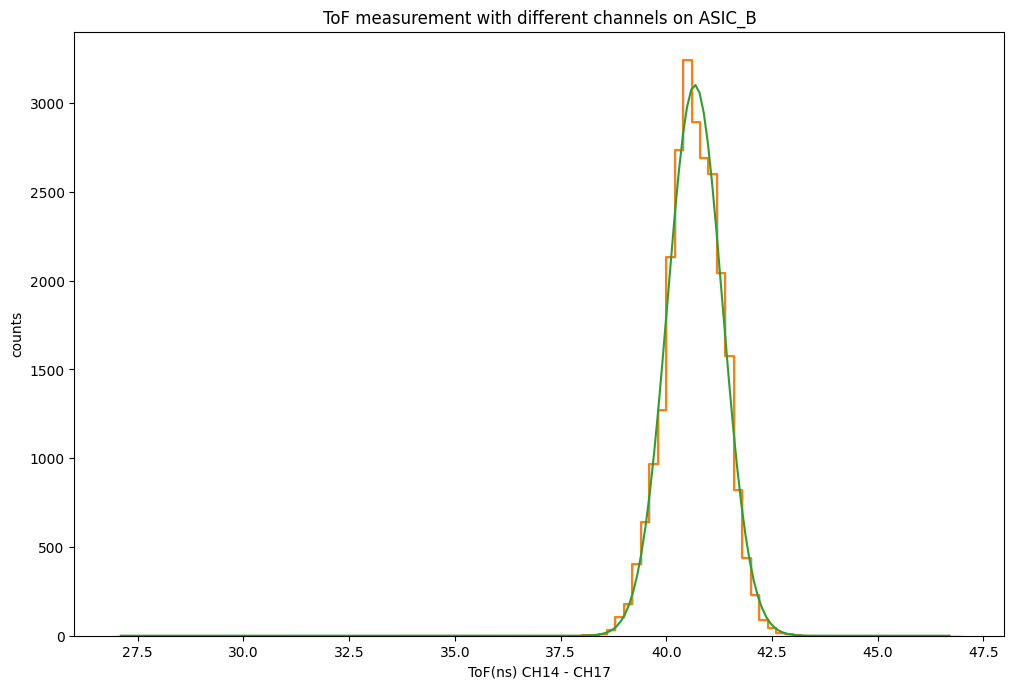

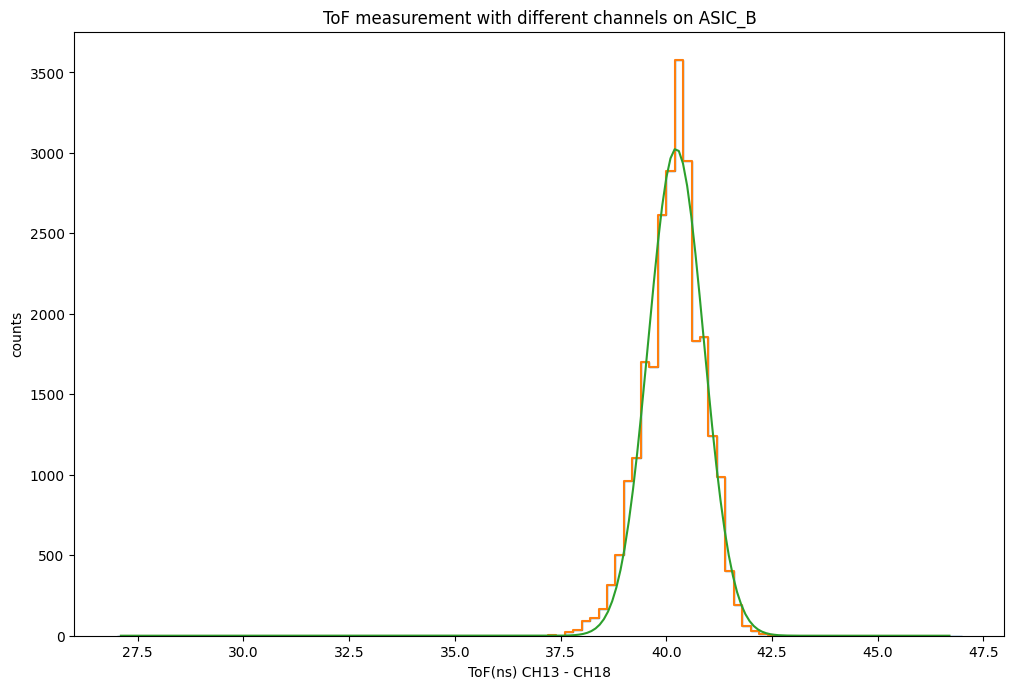

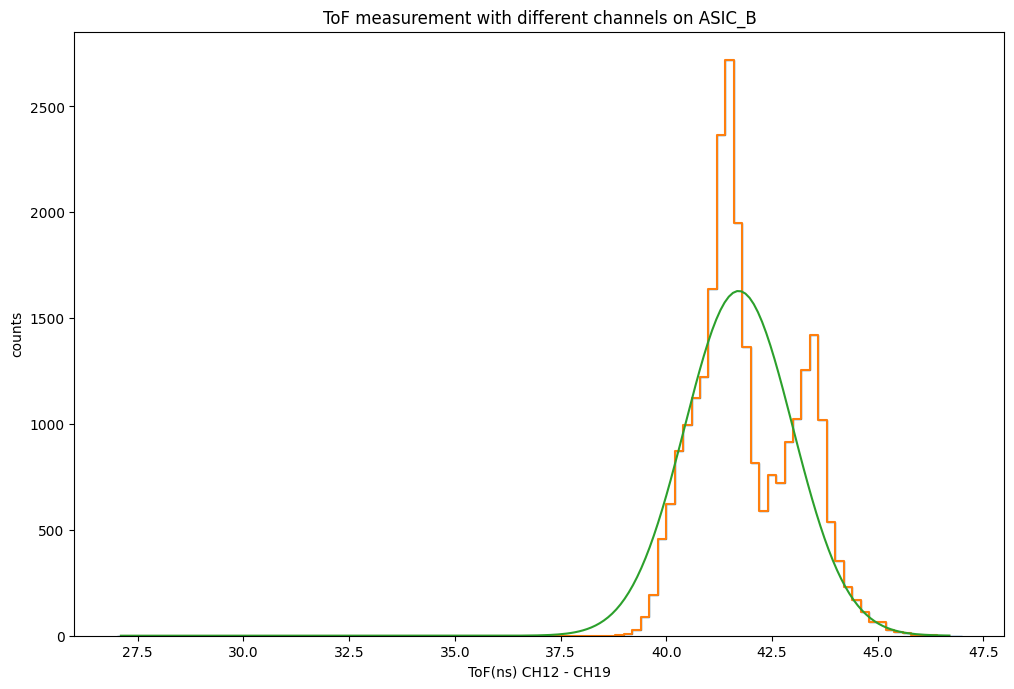

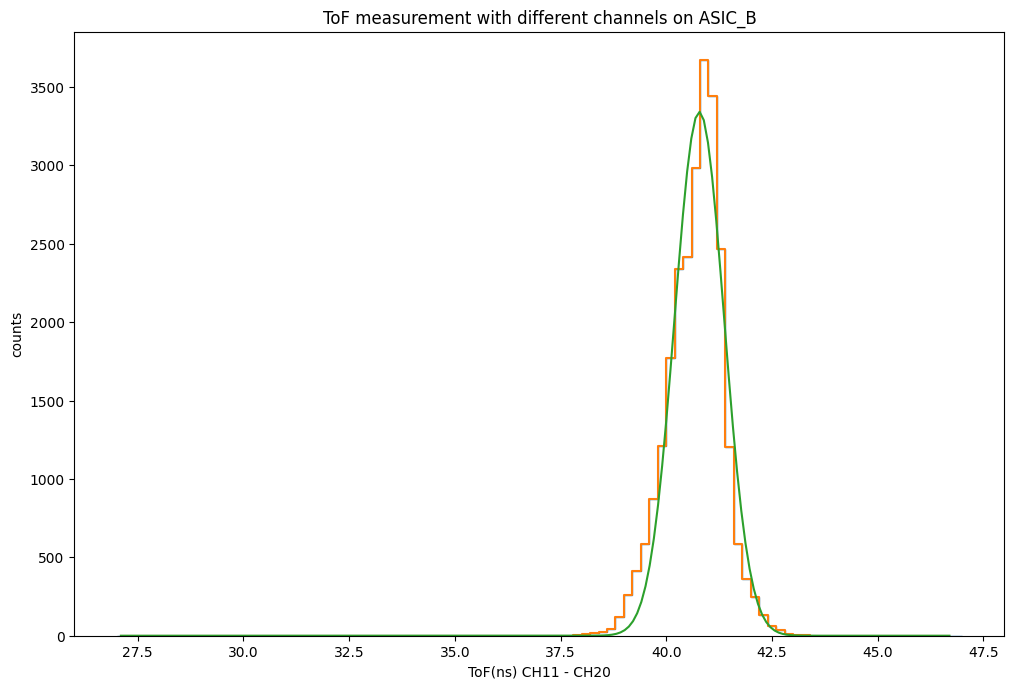

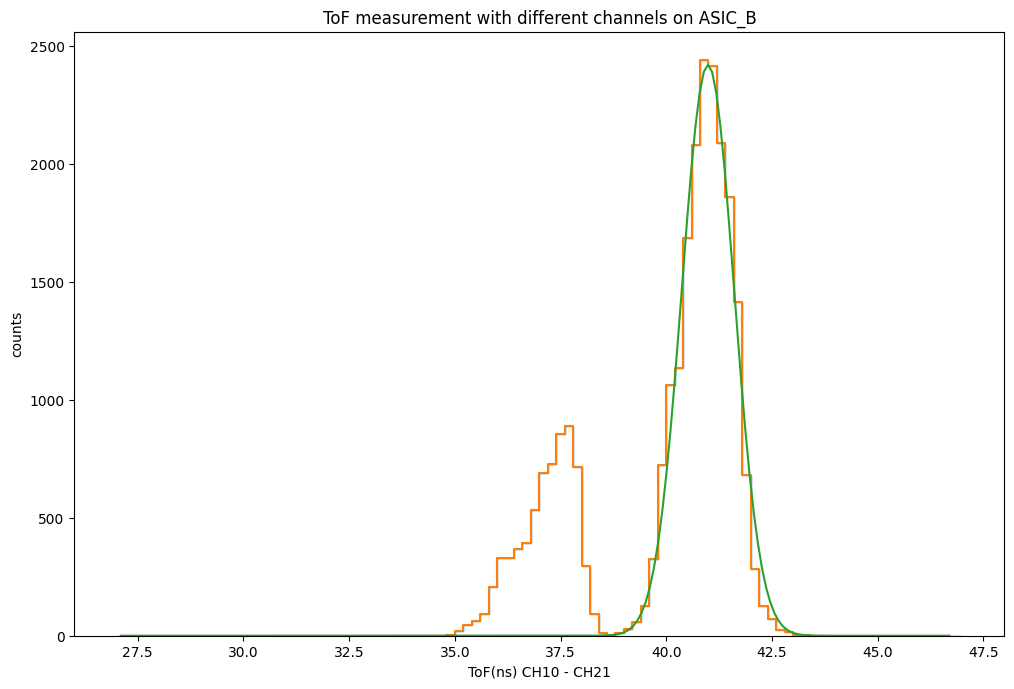

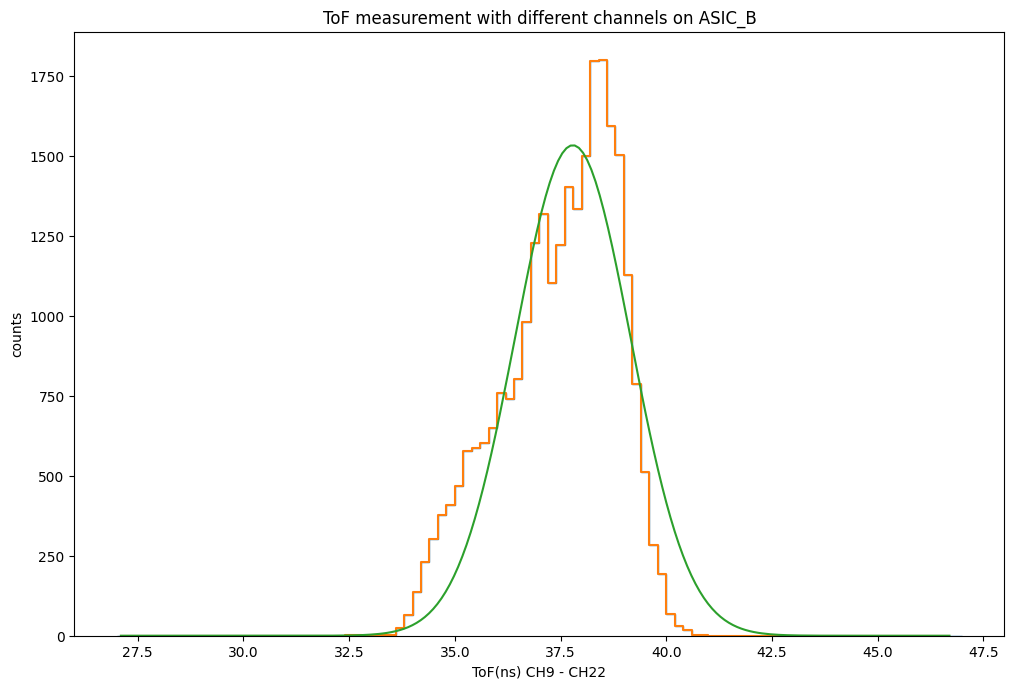

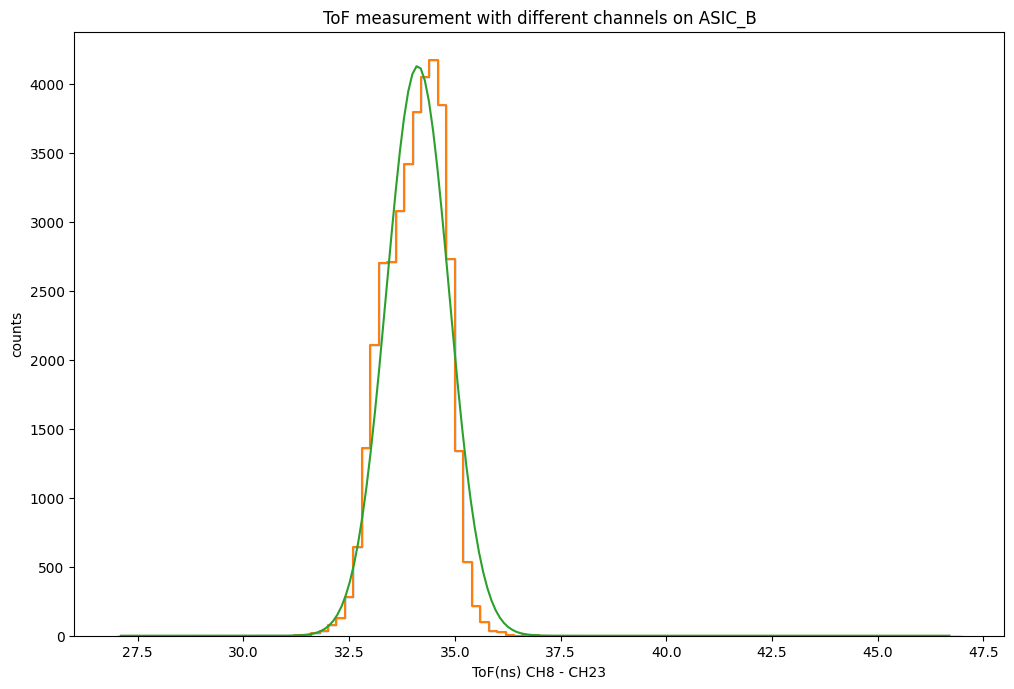

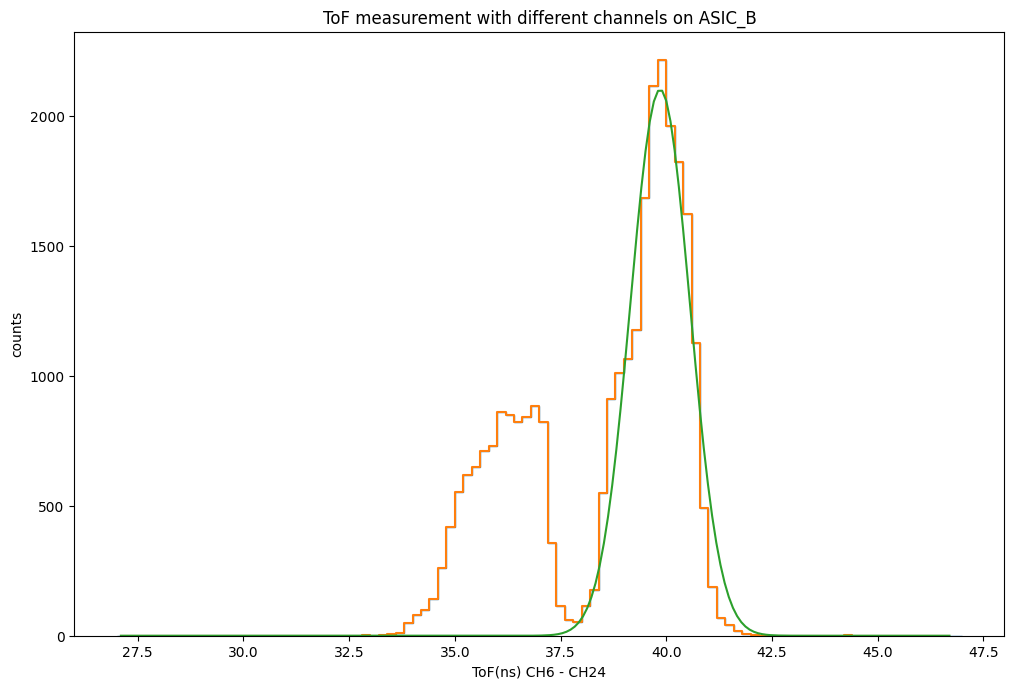

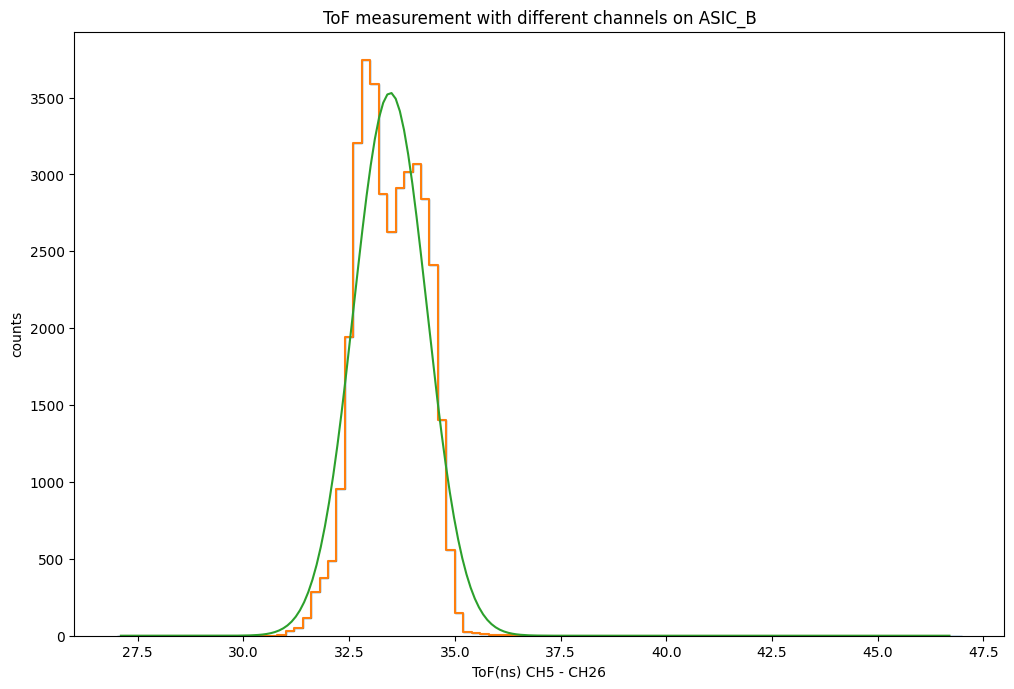

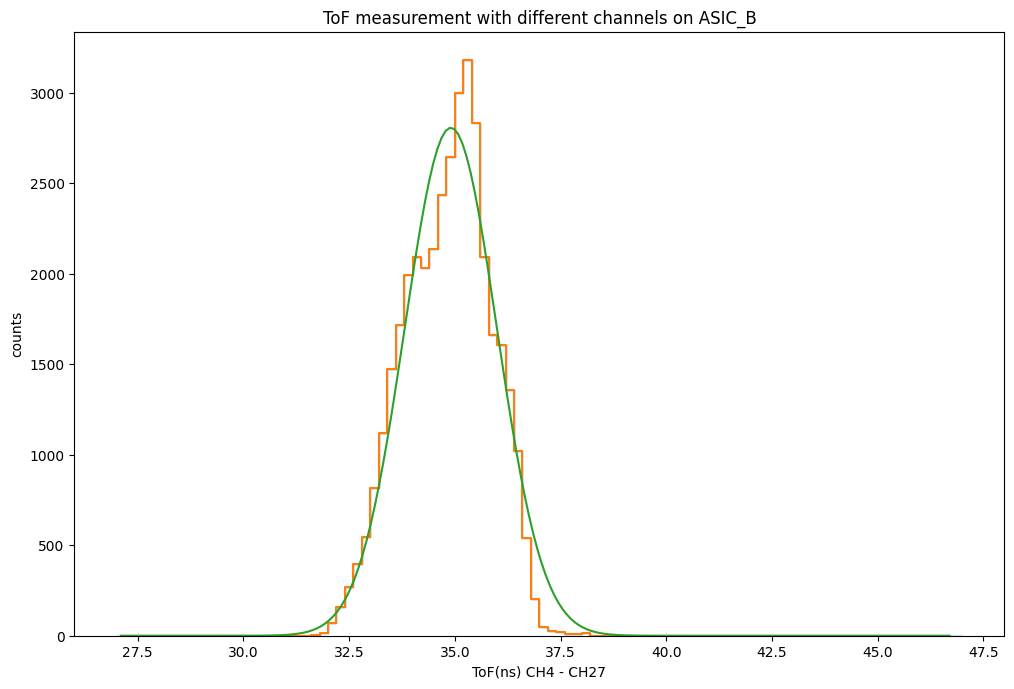

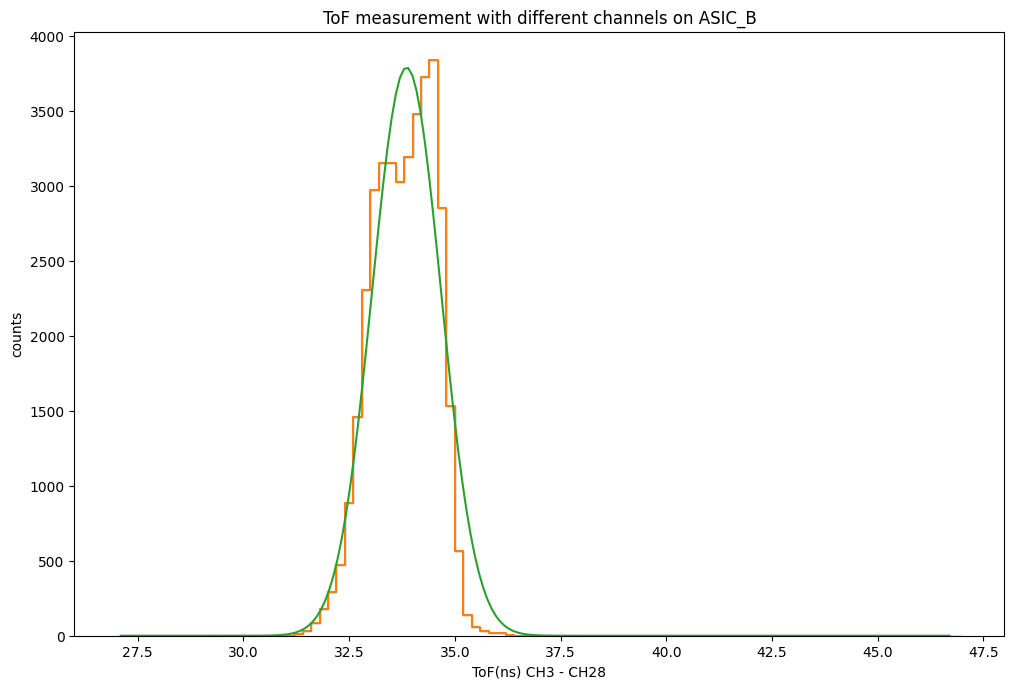

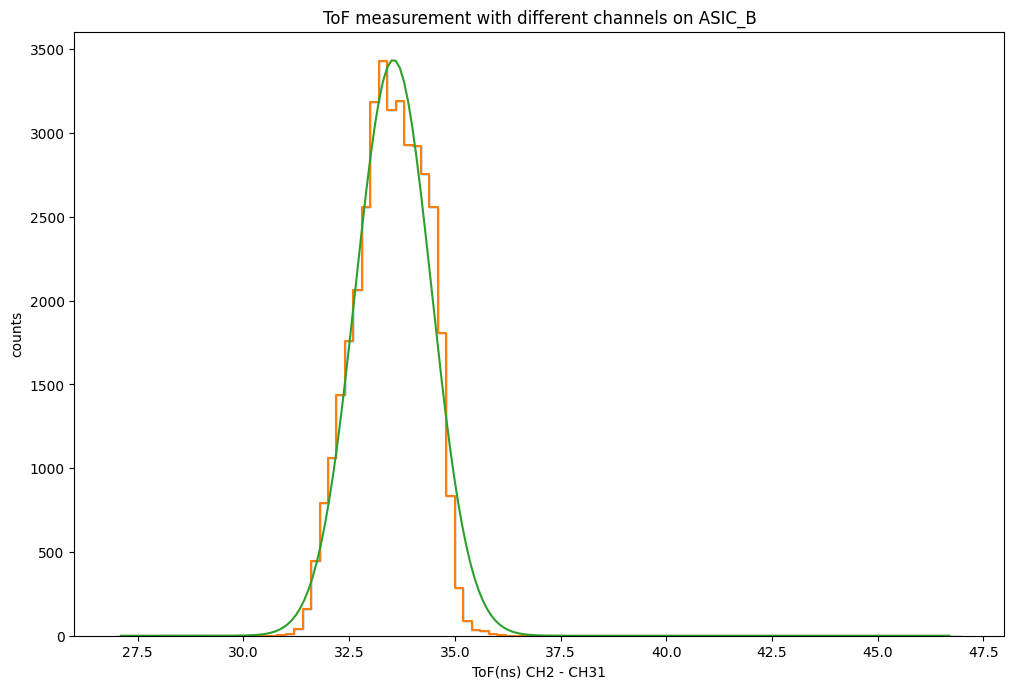

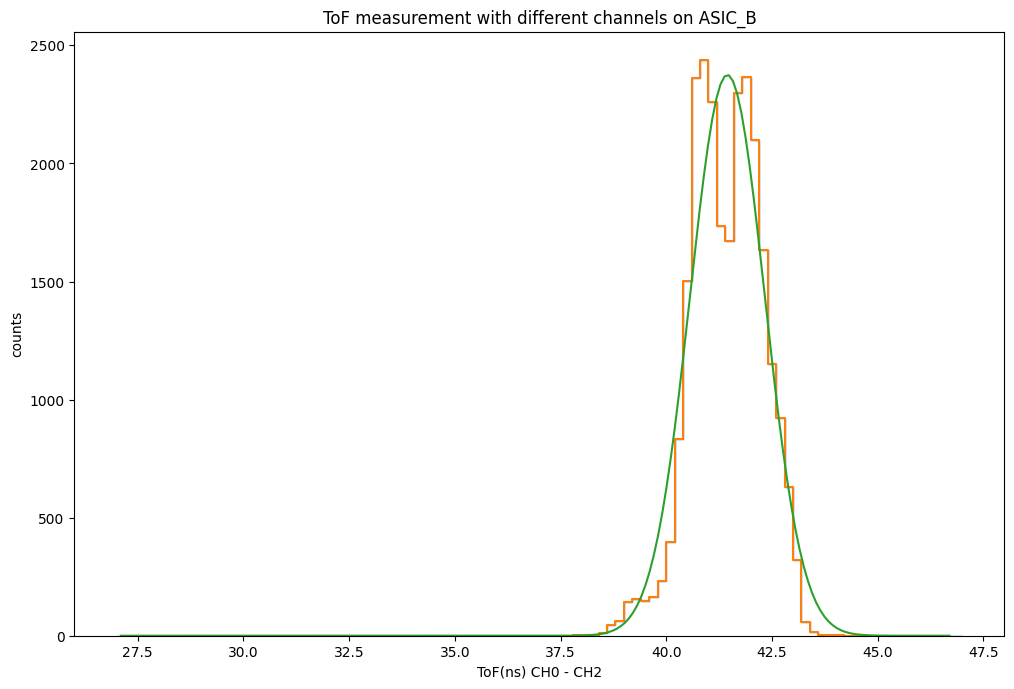

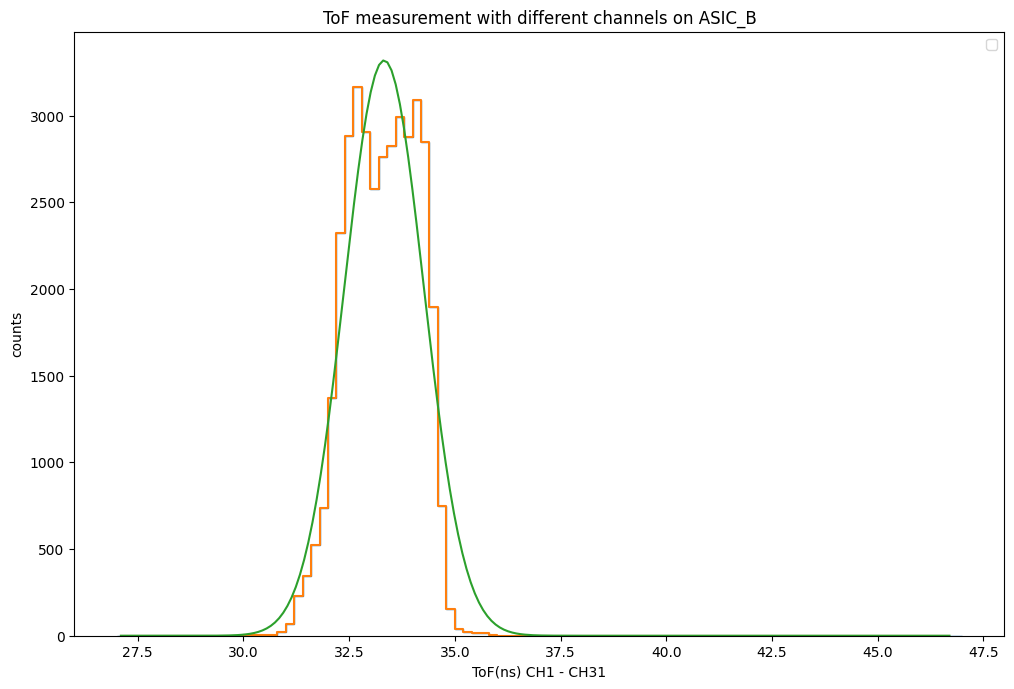

In [24]:
# ch1 = 4
# ch2 = 26

#plt.figure(figsize=(12, 8), dpi=100)
#txt = ["16*2 ns LEMO on CH26", "16ns LEMO on CH26", "No LEMO delay", "16ns LEMO on CH4","16*2 ns LEMO on CH4","16 ns LEMO on CH4","No LEMO delay"]

for i in range(14):
    filename = "ToF/1213/{0}.data".format(i+1)
    try:
        ch1, ch2 = find_channel(filename, noise_reject_rate = 0.2)
        df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.05).to_dict('list')
        print(df.keys())

        #remove fine time = 4, 1020 events
        mask = ((np.array(df['FINE_0_{0}'.format(ch1)]) > 4)&(np.array(df['FINE_0_{0}'.format(ch1)]) < 1020)&
                (np.array(df['FINE_0_{0}'.format(ch2)]) > 4)&(np.array(df['FINE_0_{0}'.format(ch2)]) < 1020)) 

        alpha = find_alpha(df, channels = ['FINE_0_{0}'.format(ch1), 'FINE_0_{0}'.format(ch2)])
        fine_time = np.multiply(alpha,np.array([df['FINE_0_{0}'.format(ch1)]-np.min(np.array(df['FINE_0_{0}'.format(ch1)])[mask]),
                                                df['FINE_0_{0}'.format(ch2)]-np.min(np.array(df['FINE_0_{0}'.format(ch2)])[mask])]).T)
        #print(fine_time)
        coarse_time = np.array([df['COARSE_0_{0}'.format(ch1)],df['COARSE_0_{0}'.format(ch2)]])*25

        time = (coarse_time-fine_time.T)
        ToF = time[0]-time[1]

        plt.figure(figsize=(12, 8), dpi=100)

        # plot fine time
        
#         plt.hist(fine_time.T[0],bins = 400, range = (-1,26), histtype = "step")
#         plt.xlabel("Fine time(ns) ASIC-A CH{0}".format(ch1))
#         plt.ylabel("counts")
#         plt.title("Fine time of one channel")
        
        # plot fine time 2d hist

    #     plt.figure(figsize=(12, 8), dpi=100)
    #     plt.hist2d(ToF, fine_time.T[1] ,bins=(200,50), range=[[-20,60],[-1,26]])
    #     plt.xlabel("ToF(ns) CH8 - CH18")
    #     plt.ylabel("Fine time(ns) CH18")
        
        # plot ToF

        hist1 = plt.hist(np.abs(ToF),bins = 100, range = (27,47), histtype = "step")
        fit = pycrp.Fit()
        #fit_1 = fit.fitGaus_from_hist(hist1[0], hist1[1], interp_points=200, make_plot=True,label = "{0}".format(txt[i]))
        fit_1 = fit.fitGaus_from_hist(hist1[0], hist1[1], interp_points=200, make_plot=True)
        print(fit_1[0][1], fit_1[0][2])
        plt.xlabel("ToF(ns) CH{0} - CH{1}".format(ch1,ch2))
        plt.ylabel("counts")
        plt.title("ToF measurement with different channels on ASIC_B")
    except:
        print(find_channel(filename, noise_reject_rate = 0.2))
plt.legend()

/tmp/ipykernel_198425/1548239175.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/1548239175.py:8: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


279
954
134
976


/tmp/ipykernel_198425/1548239175.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/1548239175.py:8: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


280
954
135
976


/tmp/ipykernel_198425/1548239175.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/1548239175.py:8: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


279
954
133
977


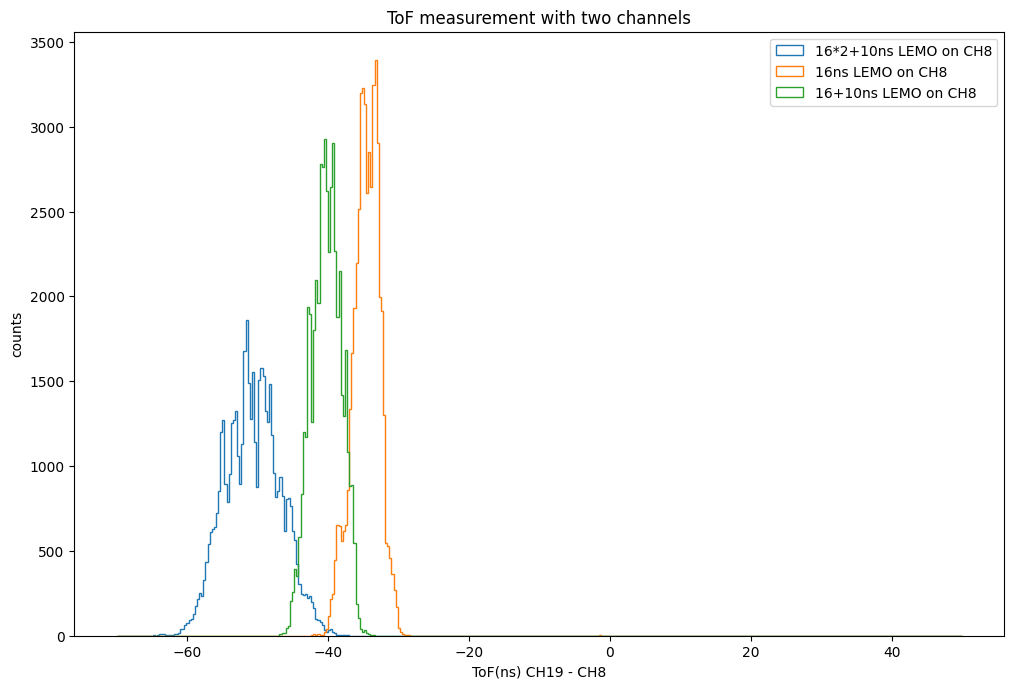

In [122]:
plt.figure(figsize=(12, 8), dpi=100)
txt = ["16*2+10ns LEMO on CH8",
       "16ns LEMO on CH8","16+10ns LEMO on CH8", "No LEMO","16ns LEMO on CH19", "16+10ns LEMO on CH19",
      "16*2+10ns LEMO on CH8"]

for i in range(3):
    filename = "ToF/1130/{0}.data".format(i+2)
    df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
    mask = (np.array(df['FINE_0_19']) != 4) &(np.array(df['FINE_0_8']) != 4)

    alpha = find_alpha(df, channels = ['FINE_0_19', 'FINE_0_8'])
    fine_time = np.multiply(alpha,np.array([df['FINE_0_19']-np.min(np.array(df['FINE_0_19'])[mask]),df['FINE_0_8']-np.min(np.array(df['FINE_0_8'])[mask])]).T)
    coarse_time = np.array([df['COARSE_0_19'],df['COARSE_0_8']])*25
    
    time = (coarse_time-fine_time.T)
    ToF = time[0]-time[1]
    
    plt.hist(ToF,bins = 400, range = (-60,-10), histtype = "step", label="{0}".format(txt[i]))
    #plt.figure(figsize=(12, 8), dpi=100)
    #plt.hist2d(ToF, fine_time.T[1] ,bins=(200,50), range=[[-50,50],[-1,26]], label="{0}".format(txt[i]))
    #plt.hist(coarse_time[0]/25,bins = 256, range = (-1,512), histtype = "step")
    plt.xlabel("ToF(ns) CH19 - CH8")
    #plt.xlabel("Fine time(ns) CH21")
    #plt.ylabel("fine_time CH21")
    plt.ylabel("counts")
    #plt.title("{0}".format(txt[i]))
    plt.title("ToF measurement with two channels")
    #plt.title("Fine time of one channel")
    plt.legend()

/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


294
983
284
972
[0.03628447 0.03633721]


/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


295
982
284
972
[0.0363901  0.03633721]


/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


294
983
284
972
[0.03628447 0.03633721]


/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


295
982
284
972
[0.0363901  0.03633721]


/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


295
983
284
971
[0.03633721 0.0363901 ]


/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_198425/47994769.py:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


295
982
285
972
[0.0363901 0.0363901]


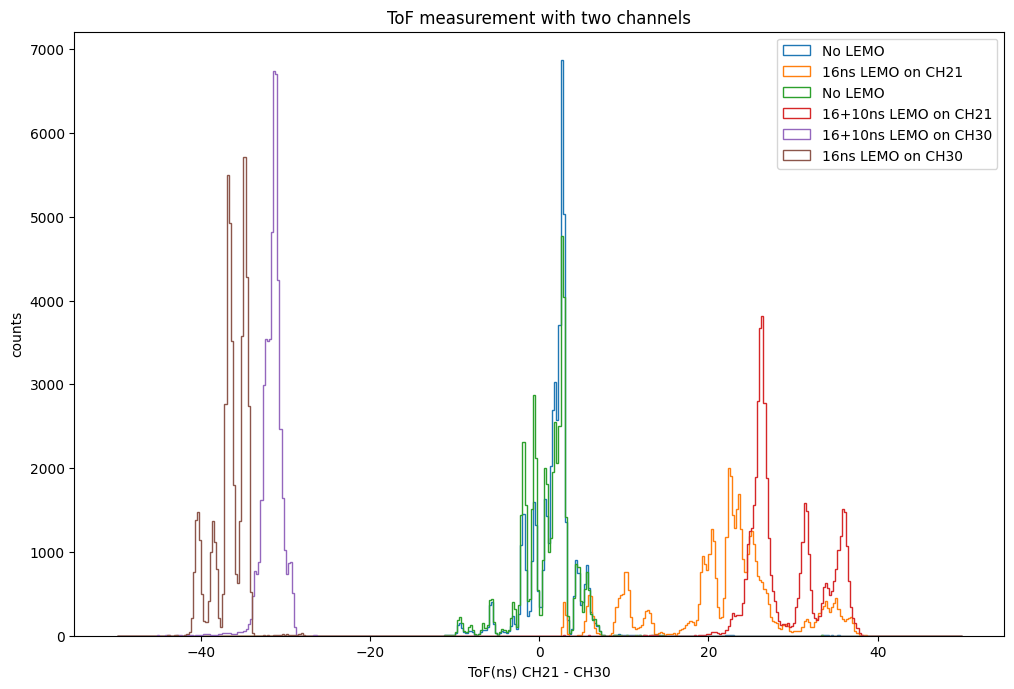

In [143]:
plt.figure(figsize=(12, 8), dpi=100)
txt = ["No LEMO","16ns LEMO on CH21","No LEMO","16+10ns LEMO on CH21","16+10ns LEMO on CH30", "16ns LEMO on CH30 "]

for i in range(6):
    filename = "ToF/1128/{0}.data".format(i+3)
    df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
    mask = (np.array(df['FINE_0_21']) != 4) &(np.array(df['FINE_0_30']) != 4)

    alpha = find_alpha(df, channels = ['FINE_0_21', 'FINE_0_30'])
    print(alpha)
    fine_time = np.multiply(alpha,np.array([df['FINE_0_21']-np.min(np.array(df['FINE_0_21'])[mask]),df['FINE_0_30']-np.min(np.array(df['FINE_0_30'])[mask])]).T)
    coarse_time = np.array([df['COARSE_0_21'],df['COARSE_0_30']])*25
    
    time = (coarse_time-fine_time.T)
    ToF = time[0]-time[1]
    
    plt.hist(ToF,bins = 400, range = (-50,50), histtype = "step", label="{0}".format(txt[i]))
    #plt.figure(figsize=(12, 8), dpi=100)
    #plt.hist2d(ToF, fine_time.T[1] ,bins=(200,50), range=[[-50,50],[-1,26]], label="{0}".format(txt[i]))
    #plt.hist(fine_time.T[1],bins = 400, range = (-1,26), histtype = "step", label="{0}".format(txt[i]))
    plt.xlabel("ToF(ns) CH21 - CH30")
    #plt.xlabel("Fine time(ns) CH21")
    #plt.ylabel("fine_time CH21")
    plt.ylabel("counts")
    #plt.title("{0}".format(txt[i]))
    plt.title("ToF measurement with two channels")
    #plt.title("Fine time of one channel")
    plt.legend()

In [180]:
filename = "ToF/1202/1.data"

In [181]:
load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01)

/tmp/ipykernel_198425/750095076.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01)
/tmp/ipykernel_198425/750095076.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01)


,ID_CLUSTER,CLUSTER_RUN_Timecode_ns,CLUSTER_Timecode_ns,NEventsInCluster,ASIC_0,EventCounter_0,RUN_EventTimeCodeLSB_0,RUN_EventTimecode_ns_0,T0_to_Event_Timecode_0,T0_to_Event_Timecode_ns_0,HIT_0_8,HIT_0_18,CHARGE_0_8,CHARGE_0_18,COARSE_0_8,COARSE_0_18,FINE_0_8,FINE_0_18,RELATIVETIME_0_8,RELATIVETIME_0_18
0,1,1226750,28311100,1,0,0,49070,1226750,1132444,28311100,1,1,190,194,430,428,643,322,38.123,0.0
1,2,5227025,60313350,1,0,1,209081,5227025,2412534,60313350,1,1,195,203,185,184,463,916,41.761,0.0
2,3,9227300,92315550,1,0,2,369092,9227300,3692622,92315550,1,1,196,203,452,451,456,827,38.727,0.0
3,4,13227575,124317800,1,0,3,529103,13227575,4972712,124317800,1,1,206,210,207,206,404,743,37.543,0.0
4,5,17227850,156320000,1,0,4,689114,17227850,6252800,156320000,1,1,187,206,476,473,826,644,68.266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4997,22198771500,16547395600,1,0,5551,887950860,22198771500,661895824,16547395600,1,1,189,202,12,11,297,680,39.171,0.0
4997,4998,22202771800,16579397850,1,0,5552,888110872,22202771800,663175914,16579397850,1,1,197,201,280,278,927,583,37.272,0.0
4998,4999,22206772075,16611400050,1,0,5553,888270883,22206772075,664456002,16611400050,1,1,202,198,35,33,825,482,37.309,0.0
4999,5000,22210772350,16643402300,1,0,5554,888430894,22210772350,665736092,16643402300,1,1,190,190,302,300,756,388,36.384,0.0


In [200]:
filename = "ToF/1121_1.data"
df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')

/tmp/ipykernel_138670/3536008696.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')
/tmp/ipykernel_138670/3536008696.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  df = load_dataset(filename, which_channels = "auto", noise_reject_rate = 0.01).to_dict('list')


In [202]:
df.keys()

dict_keys(['ID_CLUSTER', 'CLUSTER_RUN_Timecode_ns', 'CLUSTER_Timecode_ns', 'NEventsInCluster', 'ASIC_0', 'EventCounter_0', 'RUN_EventTimeCodeLSB_0', 'RUN_EventTimecode_ns_0', 'T0_to_Event_Timecode_0', 'T0_to_Event_Timecode_ns_0', 'HIT_0_8', 'HIT_0_26', 'CHARGE_0_8', 'CHARGE_0_26', 'COARSE_0_8', 'COARSE_0_26', 'FINE_0_8', 'FINE_0_26'])

290
294


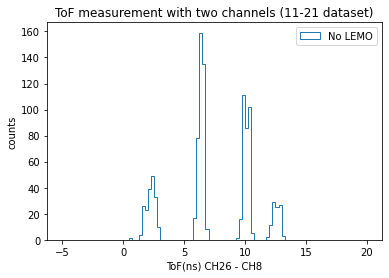

In [204]:
mask = (np.array(df['FINE_0_8']) != 4) & (np.array(df['FINE_0_26']) != 4)

alpha = find_alpha(df, channels = ['FINE_0_8', 'FINE_0_26'])
fine_time = np.multiply(alpha,np.array([df['FINE_0_8']-np.min(np.array(df['FINE_0_8'])[mask]),df['FINE_0_26']-np.min(np.array(df['FINE_0_26'])[mask])]).T)
coarse_time = np.array([df['COARSE_0_8'],df['COARSE_0_26']])*25

time = (coarse_time-fine_time.T)
ToF = time[1]-time[0]

plt.hist(ToF,bins = 100, range = (-5,20), histtype = "step", label="No LEMO")
#plt.hist(ToF,bins = 100)
plt.xlabel("ToF(ns) CH26 - CH8")
plt.ylabel("counts")
plt.title("ToF measurement with two channels (11-21 dataset)")
plt.legend()

1

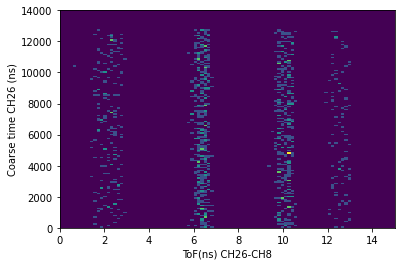

In [213]:
plt.hist2d(ToF, coarse_time[0] ,bins=(100,150), range=[[0,15],[0,14000]])
plt.xlabel("ToF(ns) CH26-CH8")
plt.ylabel("Coarse time CH26 (ns)")
1

1

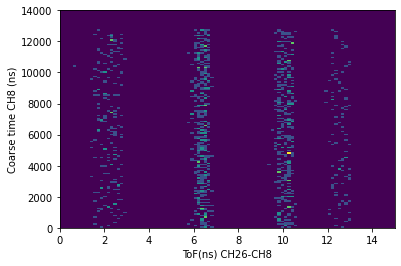

In [214]:
plt.hist2d(ToF, coarse_time[1] ,bins=(100,150), range=[[0,15],[0,14000]])
plt.xlabel("ToF(ns) CH26-CH8")
plt.ylabel("Coarse time CH8 (ns)")
1

Text(0, 0.5, 'Coarse time CH26-CH8 (ns)')

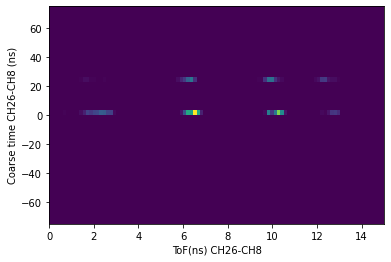

In [215]:
plt.hist2d(ToF, coarse_time[1]-coarse_time[0] ,bins=(100,40), range=[[0,15],[-75,75]])
plt.xlabel("ToF(ns) CH26-CH8")
plt.ylabel("Coarse time CH26-CH8 (ns)")

Text(0, 0.5, 'Fine time CH26 (ns)')

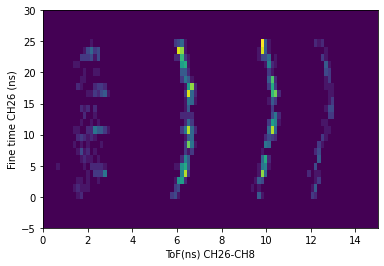

In [216]:
plt.hist2d(ToF, fine_time.T[0] ,bins=(100,30), range=[[0,15],[-5,30]])
plt.xlabel("ToF(ns) CH26-CH8")
plt.ylabel("Fine time CH26 (ns)")

Text(0, 0.5, 'Fine time CH8 (ns)')

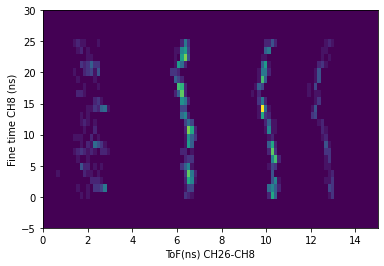

In [217]:
plt.hist2d(ToF, fine_time.T[1] ,bins=(100,30), range=[[0,15],[-5,30]])
plt.xlabel("ToF(ns) CH26-CH8")
plt.ylabel("Fine time CH8 (ns)")

In [31]:
filename = "ToF/1205/TDC.csv"
data = pd.read_csv(filename, usecols=["Maximum(3) (V)", "Minimum(3) (V)"]).to_numpy()

Text(0.5, 0, 'TDC_ramp Voltage(V)')

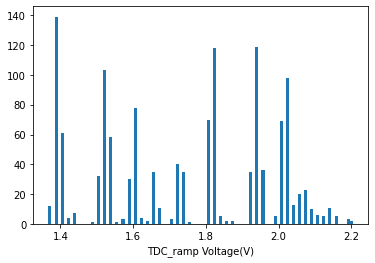

In [61]:
plt.hist(data[:,0],bins = 100)
plt.xlabel("TDC_ramp Voltage(V)")